In [1]:
#import modules and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ptitprince as pt
from scipy.stats import skew, kurtosis
import csv
import seaborn as sns


load database

In [2]:
pdb= pd.read_csv('./core_database/destress_data_cleaned_pdb_nodfire.csv')
af2 = pd. read_csv('./core_database/destress_data_cleaned_af2.csv')

In [22]:
pdb['mass'].describe()

count    3.589500e+04
mean     7.149966e+04
std      7.462230e+04
min      3.496017e+03
25%      2.850026e+04
50%      4.853321e+04
75%      8.716229e+04
max      1.174765e+06
Name: mass, dtype: float64

create new composition indexes

In [4]:
# Cluster the data about the amino acid composition into subgroups
pdb['composition_hydrophobic'] = pdb['composition_ALA'] + pdb['composition_VAL'] + pdb['composition_LEU'] + pdb['composition_ILE'] + pdb['composition_MET'] + pdb['composition_PHE'] + pdb['composition_TYR'] + pdb['composition_TRP']
pdb['composition_polar'] = pdb['composition_ASN'] + pdb['composition_GLN'] + pdb['composition_SER'] + pdb['composition_THR']
pdb['composition_acidic'] = pdb['composition_ASP'] + pdb['composition_GLU']
pdb['composition_basic'] = pdb['composition_ARG'] + pdb['composition_HIS'] + pdb['composition_LYS']
pdb['composition_cysteine'] = pdb['composition_CYS']
pdb['composition_glycine'] = pdb['composition_GLY']
pdb['composition_proline'] = pdb['composition_PRO']
pdb.drop(columns=['composition_ALA', 'composition_CYS', 'composition_ASP', 'composition_GLU', 
                'composition_PHE', 'composition_GLY', 'composition_HIS', 'composition_ILE', 
                'composition_LYS', 'composition_LEU', 'composition_MET', 'composition_ASN', 
                'composition_PRO', 'composition_GLN', 'composition_ARG', 'composition_SER', 
                'composition_THR', 'composition_VAL', 'composition_TRP', 'composition_UNK', 
                'composition_TYR'], inplace=True)

af2['composition_hydrophobic'] = af2['composition_ALA'] + af2['composition_VAL'] + af2['composition_LEU'] + af2['composition_ILE'] + af2['composition_MET'] + af2['composition_PHE'] + af2['composition_TYR'] + af2['composition_TRP']
af2['composition_polar'] = af2['composition_ASN'] + af2['composition_GLN'] + af2['composition_SER'] + af2['composition_THR']
af2['composition_acidic'] = af2['composition_ASP'] + af2['composition_GLU']
af2['composition_basic'] = af2['composition_ARG'] + af2['composition_HIS'] + af2['composition_LYS']
af2['composition_cysteine'] = af2['composition_CYS']
af2['composition_glycine'] = af2['composition_GLY']
af2['composition_proline'] = af2['composition_PRO']
af2.drop(columns=['composition_ALA', 'composition_CYS', 'composition_ASP', 'composition_GLU', 
                'composition_PHE', 'composition_GLY', 'composition_HIS', 'composition_ILE', 
                'composition_LYS', 'composition_LEU', 'composition_MET', 'composition_ASN', 
                'composition_PRO', 'composition_GLN', 'composition_ARG', 'composition_SER', 
                'composition_THR', 'composition_VAL', 'composition_TRP', 'composition_UNK', 
                'composition_TYR'], inplace=True)


Descriptive statistics

In [4]:
pdb_descriptive_data = pdb[[
       'ss_prop_alpha_helix', 'ss_prop_beta_strand',
       'ss_prop_hbonded_turn',
       'ss_prop_loop', 'hydrophobic_fitness',
       'isoelectric_point', 'charge', 'mass',
       'packing_density', 'budeff_total', 'evoef2_total',
       'rosetta_total', 'aggrescan3d_total_value',
       'aggrescan3d_avg_value', 'composition_hydrophobic', 'composition_polar',
       'composition_acidic', 'composition_basic', 'composition_cysteine',
       'composition_glycine', 'composition_proline']]
af2_descriptive_data = af2[[
       'ss_prop_alpha_helix', 'ss_prop_beta_strand',
       'ss_prop_hbonded_turn',
       'ss_prop_loop', 'hydrophobic_fitness',
       'isoelectric_point', 'charge', 'mass',
       'packing_density', 'budeff_total', 'evoef2_total',
       'rosetta_total', 'aggrescan3d_total_value',
       'aggrescan3d_avg_value', 'composition_hydrophobic', 'composition_polar',
       'composition_acidic', 'composition_basic', 'composition_cysteine',
       'composition_glycine', 'composition_proline']]

In [ ]:
af2_ds = af2_descriptive_data.describe()
pdb_ds = pdb_descriptive_data.describe()

# Calculate IQR for af2_ds
af2_iqr = af2_ds.loc['75%'] - af2_ds.loc['25%']
af2_iqr.name = 'IQR'

# Append the IQR row to af2_ds
af2_ds = af2_ds.append(af2_iqr)

# Calculate IQR for pdb_ds
pdb_iqr = pdb_ds.loc['75%'] - pdb_ds.loc['25%']
pdb_iqr.name = 'IQR'

# Append the IQR row to pdb_ds
pdb_ds = pdb_ds.append(pdb_iqr)

af2_ds = af2_ds.drop(['25%', '50%', '75%'], axis=0)

# Drop the 25%, 50%, and 75% rows from pdb_ds
pdb_ds = pdb_ds.drop(['25%', '50%', '75%'], axis=0)

In [ ]:
wholedata_ds = pd.concat([af2_ds, pdb_ds], axis=0) 
wholedata_ds.to_csv('./output_tables/descriptive_statistics_comparison_wholedata.csv')

draw boxplots

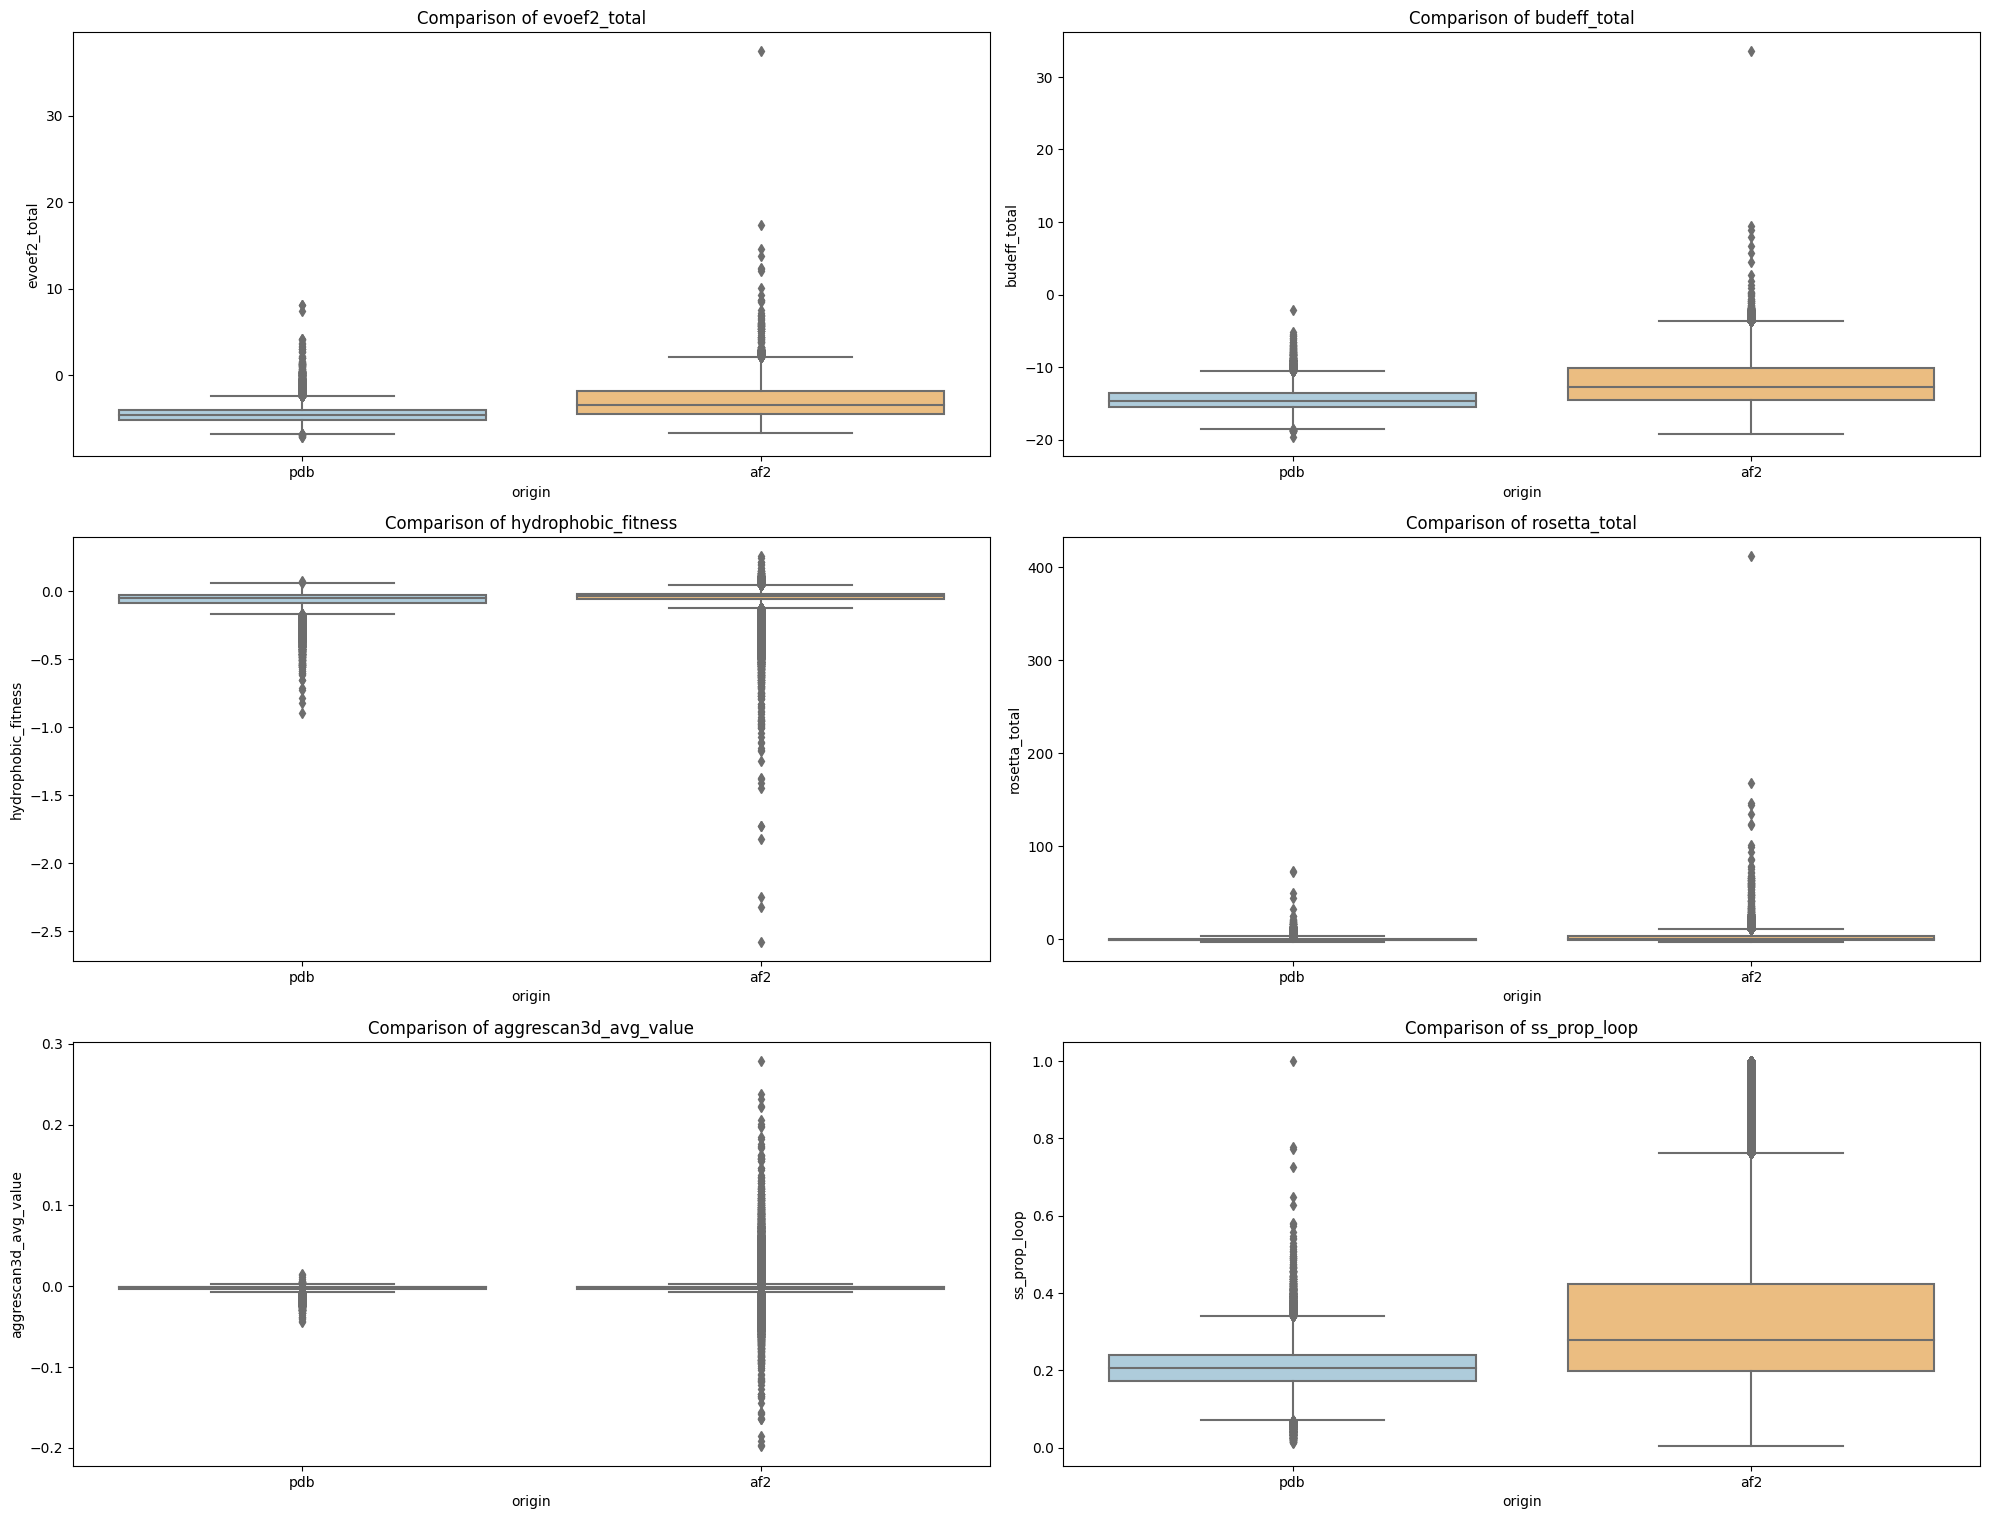

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_compare = ['evoef2_total','budeff_total','hydrophobic_fitness','rosetta_total',
                      'aggrescan3d_avg_value','ss_prop_loop',
                    ]

# Create a new DataFrame for combined data with an additional column to indicate the origin
af22 = af2.copy()
pdb2 = pdb.copy()

af22['origin'] = 'af2'
pdb2['origin'] = 'pdb'
combined_data = pd.concat([pdb2,af22], ignore_index=True)
boxplot_palette = {'af2': '#FDBF6F', 'pdb': '#A6CEE3'}
# Draw the comparison boxplots
plt.figure(figsize=(20,30))
for i, column in enumerate(columns_to_compare, start=1):
    plt.subplot(6, 2, i)
    sns.boxplot(x='origin', y=column, data=combined_data,palette=boxplot_palette)
    plt.title(f'Comparison of {column}')
#plt.suptitle('Comparison boxplots of PDB and AF2', fontsize=20)

plt.tight_layout()
#plt.savefig('./figures/boxplot_comparison_wholedata.png')
plt.show()


Check and compare the distribution of fundamental indexes

In [11]:
import matplotlib.pyplot as plt

def compare_histograms(df1, df2, column_name, df1_name=None, df2_name=None, sample_size=10000, random_state=0):
    # Set the name for the dataframes if provided
    if not df1_name:
        df1_name = 'df1'
    if not df2_name:
        df2_name = 'df2'

    # Sample the data from both dataframes
    sample_df1 = df1[column_name].sample(n=sample_size, random_state=random_state)
    sample_df2 = df2[column_name].sample(n=sample_size, random_state=random_state)

    # Set the figure size
    plt.figure(figsize=(9, 4))

    # Plot histogram of the first dataframe
    plt.hist(sample_df1, bins=100, color='#A6CEE3', alpha=1, label=df1_name)#f'{df1_name}')

    # Plot histogram of the second dataframe
    plt.hist(sample_df2, bins=100, color='#FDBF6F', alpha=0.7, label=df2_name)#f'{df2_name}')

    # Add labels and legend
    
    plt.ylabel('Count')
    plt.grid(True)
    plt.legend()
    if len(column_name.split("_"))==1:
        plt.title(f'Distribution Comparison ({sample_size} samples) of {column_name} for {df1_name} and {df2_name}', fontsize=10)
        plt.xlabel(column_name)
    if len(column_name.split("_"))==2:
        plt.title(f'Distribution Comparison ({sample_size} samples) of {column_name.split("_")[0]} {column_name.split("_")[1]} for {df1_name} and {df2_name}', fontsize=10)
        plt.xlabel(column_name.split("_")[0]+' ' +column_name.split("_")[1])
    if len(column_name.split("_"))==3:
        plt.title(f'Distribution Comparison ({sample_size} samples) of {column_name.split("_")[0]} {column_name.split("_")[1]} {column_name.split("_")[2]} for {df1_name} and {df2_name}', fontsize=10)
        plt.xlabel(column_name.split("_")[0]+' ' +column_name.split("_")[1]+' ' +column_name.split("_")[2])
    if len(column_name.split("_"))==4:
        plt.title(f'Distribution Comparison ({sample_size} samples) of {column_name.split("_")[0]} {column_name.split("_")[1]} {column_name.split("_")[2]} {column_name.split("_")[3]} for {df1_name} and {df2_name}', fontsize=10)
        plt.xlabel(column_name.split("_")[0]+' ' +column_name.split("_")[1]+' ' +column_name.split("_")[2]+' ' +column_name.split("_")[3])
    if len(column_name.split("_"))==5:
        plt.title(f'Distribution Comparison ({sample_size} samples) of {column_name.split("_")[0]} {column_name.split("_")[1]} {column_name.split("_")[2]} {column_name.split("_")[3]} {column_name.split("_")[4]} for {df1_name} and {df2_name}', fontsize=10)
        plt.xlabel(column_name.split("_")[0]+' ' +column_name.split("_")[1]+' ' +column_name.split("_")[2]+' ' +column_name.split("_")[3]+' ' +column_name.split("_")[4])
    # Display the plot
    
    plt.savefig(f'./figures/appendix/{df1_name}_{df2_name}_distribution_comparison_{column_name}.png', dpi=300)
    #plt.show()

# compare_histograms(pdb, af2, 'isoelectric_point',


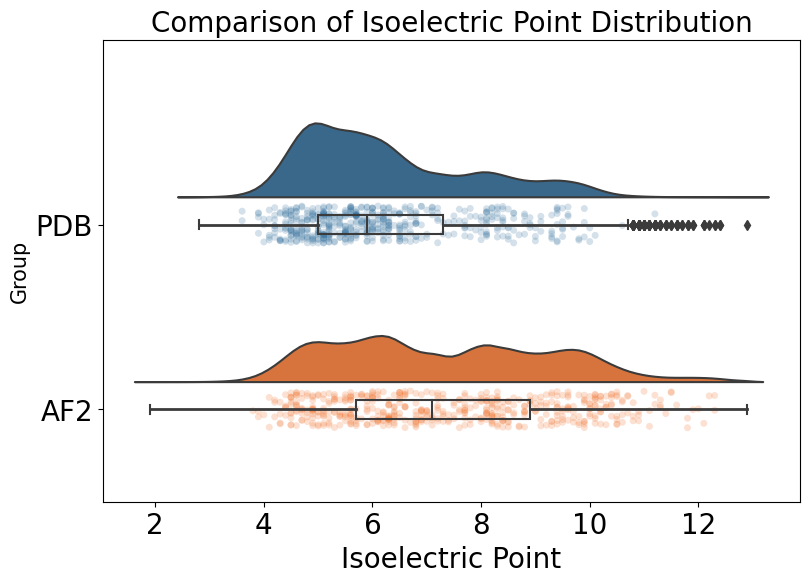

In [22]:
plt.figure(figsize=(9, 6))
# Assuming you have mass_df1 and mass_df2 as given in your question
pi_df1 = pdb['isoelectric_point']
pi_df2 = af2['isoelectric_point']

# Prepare data for Seaborn
pi_df1 = pd.DataFrame({'isoelectric_point': pi_df1, 'group': 'PDB'})
pi_df2 = pd.DataFrame({'isoelectric_point': pi_df2, 'group': 'AF2'})

#sample data for plotting stripplot
pi_df1_sample = pi_df1.sample(n=500, random_state=0)
pi_df2_sample = pi_df2.sample(n=500, random_state=0)

combined_data = pd.concat([pi_df1, pi_df2])
combined_data_sample = pd.concat([pi_df1_sample, pi_df2_sample])



# Define colors for the groups
colors = {'PDB': '#2b6a99', 'AF2': '#f16c23'}

# Define fontsize 

# Create half violin plots
pt.half_violinplot(data=combined_data, y="group", x="isoelectric_point", inner=None,palette=colors)

# Overlay box plots
sns.boxplot(data=combined_data, y="group", x="isoelectric_point", width=0.1, zorder=10,linewidth=1.5,
            boxprops={'facecolor': 'none', "zorder": 10},
            whiskerprops={'linewidth': 2, "zorder": 10},palette=colors)

# Add strip plot
sns.stripplot(data=combined_data_sample, y="group", x="isoelectric_point", jitter=1, 
              edgecolor="white", zorder=0,palette=colors, alpha=0.2)
plt.ylim(1.5, -1)


plt.title("Comparison of Isoelectric Point Distribution",fontsize=20)
# Save and show the plot
plt.xlabel('Isoelectric Point',fontsize=20)
plt.ylabel('Group',fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("./figures/raincloud_pI_data.png", dpi=300)
plt.show()


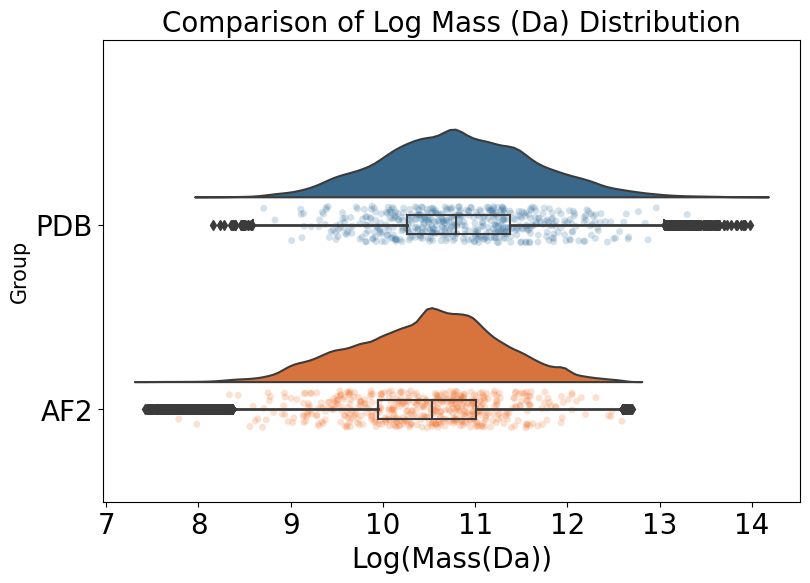

In [23]:
plt.figure(figsize=(9, 6))
# Assuming you have mass_df1 and mass_df2 as given in your question
mass_df1 = pdb['mass']
mass_df2 = af2['mass']

# Prepare data for Seaborn
data1 = pd.DataFrame({'mass': mass_df1, 'group': 'PDB'})
data2 = pd.DataFrame({'mass': mass_df2, 'group': 'AF2'})

#sample data for plotting stripplot
mass_df1_sample = data1.sample(n=500, random_state=0)
mass_df2_sample = data2.sample(n=500, random_state=0)

combined_data = pd.concat([data1, data2])
combined_data_sample = pd.concat([mass_df1_sample, mass_df2_sample])

# Apply logarithmic transformation
combined_data['log_mass'] = np.log(combined_data['mass'])
combined_data_sample['log_mass'] = np.log(combined_data_sample['mass'])

# Define colors for the groups
colors = {'PDB': '#2b6a99', 'AF2': '#f16c23'}

# Create half violin plots
pt.half_violinplot(data=combined_data, y="group", x="log_mass", inner=None,palette=colors)

# Overlay box plots
sns.boxplot(data=combined_data, y="group", x="log_mass", width=0.1, zorder=10,linewidth=1.5,
            boxprops={'facecolor': 'none', "zorder": 10},
            whiskerprops={'linewidth': 2, "zorder": 10},palette=colors)

# Add strip plot
sns.stripplot(data=combined_data_sample, y="group", x="log_mass", jitter=1, 
              edgecolor="white", zorder=0,palette=colors, alpha=0.2)
plt.ylim(1.5, -1)


plt.title("Comparison of Log Mass (Da) Distribution",fontsize=20)
# Save and show the plot
plt.xlabel('Log(Mass(Da))',fontsize=20)
plt.ylabel('Group',fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("./figures/raincloud_log_mass_data.png", dpi=300)
plt.show()


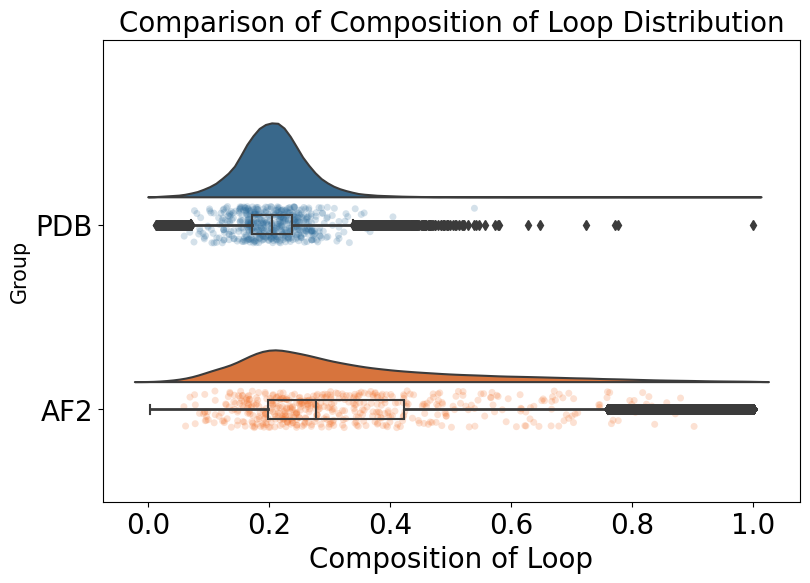

In [24]:
plt.figure(figsize=(9, 6))
# Assuming you have mass_df1 and mass_df2 as given in your question
ssp_df1 = pdb['ss_prop_loop']
ssp_df2 = af2['ss_prop_loop']

# Prepare data for Seaborn
ssp_df1 = pd.DataFrame({'Composition of Loop': ssp_df1, 'group': 'PDB'})
ssp_df2 = pd.DataFrame({'Composition of Loop': ssp_df2, 'group': 'AF2'})

#sample data for plotting stripplot
ssp_df1_sample = ssp_df1.sample(n=500, random_state=0)
ssp_df2_sample = ssp_df2.sample(n=500, random_state=0)

combined_data = pd.concat([ssp_df1, ssp_df2])
combined_data_sample = pd.concat([ssp_df1_sample, ssp_df2_sample])

# Define colors for the groups
colors = {'PDB': '#2b6a99', 'AF2': '#f16c23'}

# Create half violin plots
pt.half_violinplot(data=combined_data, y="group", x="Composition of Loop", inner=None, palette=colors)

# Overlay box plots
sns.boxplot(data=combined_data, y="group", x="Composition of Loop", width=0.1, zorder=10, linewidth=1.5,
            boxprops={'facecolor': 'none', "zorder": 10},
            whiskerprops={'linewidth': 2, "zorder": 10},palette=colors)

# Add strip plot
sns.stripplot(data=combined_data_sample, y="group", x="Composition of Loop", jitter=1, 
              edgecolor="white", zorder=0,palette=colors, alpha=0.2)
plt.ylim(1.5, -1)


plt.title("Comparison of Composition of Loop Distribution",fontsize=20)
# Save and show the plot
plt.xlabel('Composition of Loop',fontsize=20)
plt.ylabel('Group',fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("./figures/raincloud_loop_data.png", dpi=300)
plt.show()


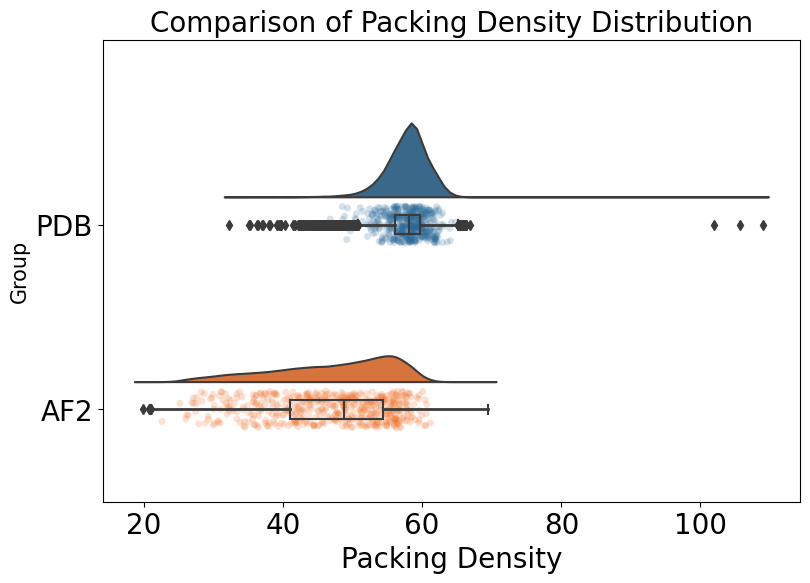

In [25]:
plt.figure(figsize=(9, 6))
# Assuming you have mass_df1 and mass_df2 as given in your question
pd_df1 = pdb['packing_density']
pd_df2 = af2['packing_density']

# Prepare data for Seaborn
pd_df1 = pd.DataFrame({'packing_density': pd_df1, 'group': 'PDB'})
pd_df2 = pd.DataFrame({'packing_density': pd_df2, 'group': 'AF2'})

#sample data for plotting stripplot
pd_df1_sample = pd_df1.sample(n=500, random_state=0)
pd_df2_sample = pd_df2.sample(n=500, random_state=0)

combined_data = pd.concat([pd_df1, pd_df2])
combined_data_sample = pd.concat([pd_df1_sample, pd_df2_sample])

# Define colors for the groups
colors = {'PDB': '#2b6a99', 'AF2': '#f16c23'}

# Create half violin plots
pt.half_violinplot(data=combined_data, y="group", x="packing_density", inner=None, palette=colors)

# Overlay box plots
sns.boxplot(data=combined_data, y="group", x="packing_density", width=0.1, zorder=10, linewidth=1.5,
            boxprops={'facecolor': 'none', "zorder": 10},
            whiskerprops={'linewidth': 2, "zorder": 10},palette=colors)

# Add strip plot
sns.stripplot(data=combined_data_sample, y="group", x="packing_density", jitter=1, 
              edgecolor="white", zorder=0,palette=colors, alpha=0.2)
plt.ylim(1.5, -1)


plt.title("Comparison of Packing Density Distribution",fontsize=20)
# Save and show the plot
plt.xlabel('Packing Density',fontsize=20)
plt.ylabel('Group',fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("./figures/raincloud_packing_density_data.png", dpi=300)
plt.show()


In [ ]:
for i in ['ss_prop_alpha_helix','ss_prop_beta_bridge','ss_prop_beta_strand','ss_prop_3_10_helix',
          'ss_prop_pi_helix','ss_prop_hbonded_turn','ss_prop_bend','ss_prop_loop',
          'hydrophobic_fitness','packing_density','budeff_total','evoef2_total','rosetta_total',
          ]:
    compare_histograms(pdb, af2, i, df1_name='PDB', df2_name='AF2',random_state= 0)
for i in [
          'aggrescan3d_total_value','aggrescan3d_avg_value',
          'composition_hydrophobic','composition_polar','composition_acidic','composition_basic','composition_cysteine',
          'composition_glycine','composition_proline']:
    compare_histograms(pdb, af2, i, df1_name='PDB', df2_name='AF2',random_state= 0)

descriptive analysis between PDB and Pisces data

In [13]:
pdb_original = pd.read_csv('./core_database/destress_data_pdb.csv') #(189942, 72)
pdb_cleaned = pd.read_csv ('./core_database/destress_data_cleaned_pdb_nodfire.csv')#(35895, 71)
af2_original = pd.read_csv ('./core_database/destress_data_af2.csv') #(564446, 72)
af2_cleaned= pd. read_csv('./core_database/destress_data_cleaned_af2.csv') #(562043, 71)

In [15]:
pdb_cleaned.loc[:,[
    'hydrophobic_fitness', 'budeff_total', 'budeff_steric', 'budeff_desolvation', 
                'budeff_charge', 'evoef2_total', 'evoef2_ref_total', 'evoef2_intraR_total', 
                'evoef2_interS_total', 'evoef2_interD_total',  'rosetta_total', 
                'rosetta_fa_atr', 'rosetta_fa_rep', 'rosetta_fa_intra_rep', 'rosetta_fa_elec', 
                'rosetta_fa_sol', 'rosetta_lk_ball_wtd', 'rosetta_fa_intra_sol_xover4', 
                'rosetta_hbond_lr_bb', 'rosetta_hbond_sr_bb', 'rosetta_hbond_bb_sc', 'rosetta_hbond_sc', 
                'rosetta_dslf_fa13', 'rosetta_rama_prepro', 'rosetta_p_aa_pp', 'rosetta_fa_dun', 
                'rosetta_omega', 'rosetta_pro_close', 'rosetta_yhh_planarity', 'aggrescan3d_total_value', 
                'aggrescan3d_avg_value', 'aggrescan3d_min_value', 'aggrescan3d_max_value'
],] = pdb_cleaned.loc[:,[
    'hydrophobic_fitness', 'budeff_total', 'budeff_steric', 'budeff_desolvation', 
                'budeff_charge', 'evoef2_total', 'evoef2_ref_total', 'evoef2_intraR_total', 
                'evoef2_interS_total', 'evoef2_interD_total',  'rosetta_total', 
                'rosetta_fa_atr', 'rosetta_fa_rep', 'rosetta_fa_intra_rep', 'rosetta_fa_elec', 
                'rosetta_fa_sol', 'rosetta_lk_ball_wtd', 'rosetta_fa_intra_sol_xover4', 
                'rosetta_hbond_lr_bb', 'rosetta_hbond_sr_bb', 'rosetta_hbond_bb_sc', 'rosetta_hbond_sc', 
                'rosetta_dslf_fa13', 'rosetta_rama_prepro', 'rosetta_p_aa_pp', 'rosetta_fa_dun', 
                'rosetta_omega', 'rosetta_pro_close', 'rosetta_yhh_planarity', 'aggrescan3d_total_value', 
                'aggrescan3d_avg_value', 'aggrescan3d_min_value', 'aggrescan3d_max_value'
],].mul(pdb_cleaned['num_residues'],axis=0) 

In [17]:
af2_cleaned.loc[:,[
    'hydrophobic_fitness', 'budeff_total', 'budeff_steric', 'budeff_desolvation', 
                'budeff_charge', 'evoef2_total', 'evoef2_ref_total', 'evoef2_intraR_total', 
                'evoef2_interS_total', 'evoef2_interD_total',  'rosetta_total', 
                'rosetta_fa_atr', 'rosetta_fa_rep', 'rosetta_fa_intra_rep', 'rosetta_fa_elec', 
                'rosetta_fa_sol', 'rosetta_lk_ball_wtd', 'rosetta_fa_intra_sol_xover4', 
                'rosetta_hbond_lr_bb', 'rosetta_hbond_sr_bb', 'rosetta_hbond_bb_sc', 'rosetta_hbond_sc', 
                'rosetta_dslf_fa13', 'rosetta_rama_prepro', 'rosetta_p_aa_pp', 'rosetta_fa_dun', 
                'rosetta_omega', 'rosetta_pro_close', 'rosetta_yhh_planarity', 'aggrescan3d_total_value', 
                'aggrescan3d_avg_value', 'aggrescan3d_min_value', 'aggrescan3d_max_value'
],] = af2_cleaned.loc[:,[
    'hydrophobic_fitness', 'budeff_total', 'budeff_steric', 'budeff_desolvation', 
                'budeff_charge', 'evoef2_total', 'evoef2_ref_total', 'evoef2_intraR_total', 
                'evoef2_interS_total', 'evoef2_interD_total',  'rosetta_total', 
                'rosetta_fa_atr', 'rosetta_fa_rep', 'rosetta_fa_intra_rep', 'rosetta_fa_elec', 
                'rosetta_fa_sol', 'rosetta_lk_ball_wtd', 'rosetta_fa_intra_sol_xover4', 
                'rosetta_hbond_lr_bb', 'rosetta_hbond_sr_bb', 'rosetta_hbond_bb_sc', 'rosetta_hbond_sc', 
                'rosetta_dslf_fa13', 'rosetta_rama_prepro', 'rosetta_p_aa_pp', 'rosetta_fa_dun', 
                'rosetta_omega', 'rosetta_pro_close', 'rosetta_yhh_planarity', 'aggrescan3d_total_value', 
                'aggrescan3d_avg_value', 'aggrescan3d_min_value', 'aggrescan3d_max_value'
],].mul(af2_cleaned['num_residues'],axis=0) 

In [18]:
pdb_original_ds = pdb_original.describe()
pdb_cleaned_ds = pdb_cleaned.describe()
af2_original_ds = af2_original.describe()
af2_cleaned_ds = af2_cleaned.describe()
ds = pd.concat([pdb_original_ds, pdb_cleaned_ds, af2_original_ds, af2_cleaned_ds], axis=0)
ds.to_csv('./output_tables/Descrptive Analysis/describe_statistics.csv',index = False)

In [12]:
pdb_original_ds.describe

<bound method NDFrame.describe of        composition_ALA  composition_CYS  composition_ASP  composition_GLU  \
count    179385.000000    179385.000000    179385.000000    179385.000000   
mean          0.074910         0.017302         0.055088         0.063583   
std           0.035678         0.024299         0.020644         0.027667   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.052632         0.004528         0.044118         0.047619   
50%           0.070561         0.012397         0.055507         0.063636   
75%           0.093909         0.021201         0.066641         0.078550   
max           1.000000         0.461538         0.666667         0.352941   

       composition_PHE  composition_GLY  composition_HIS  composition_ILE  \
count    179385.000000    179385.000000    179385.000000    179385.000000   
mean          0.039985         0.070973         0.023436         0.055433   
std           0.018510         0.030326  